In [1]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

import keras

(x_train, y_train),(x_val, y_val) = tf.keras.datasets.mnist.load_data()
x_train = (x_train/255.0)[...,None]
x_val = (x_val/255.0)[...,None]
print(x_train.shape)
print(x_val.shape)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
import tensorflow as tf

import keras

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding = 'same', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', padding = 'same'),
    tf.keras.layers.GlobalMaxPooling2D(),

    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],

)

/Users/konaraksharma/Desktop/kk/tf-experiments/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


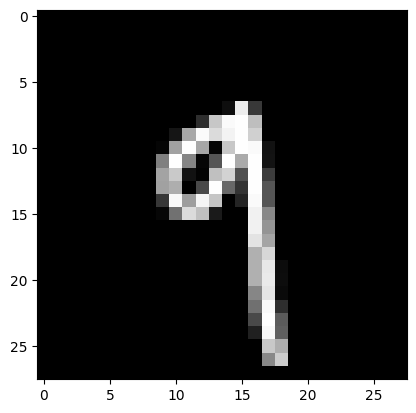

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

import keras

#to show the images from dataset
idx = random.randint(0, len(x_train)) #picks out random index from dataset
plt.imshow(x_train[idx].squeeze(), cmap = 'gray')#will show the image at that index in grayscale
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

import keras

#MODEL TRAINING
model.fit(x_train, y_train, epochs = 5, batch_size = 32) #training in 5 iterations


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9427 - loss: 0.1806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9844 - loss: 0.0511
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9883 - loss: 0.0376
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9909 - loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9926 - loss: 0.0228


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9891 - loss: 0.0346


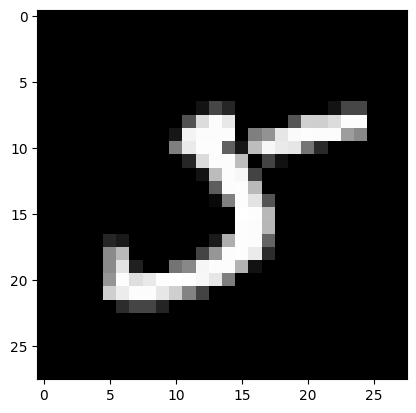

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This number is five


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

import keras
#MODEL TESTING 
model.evaluate(x_val, y_val)

#MODEL PREDICTIONS
# the model will pick random image and will predict its number in words

idx2 = random.randint(0, len(y_val))
plt.imshow(x_val[idx2].squeeze(),cmap = 'gray')
plt.show()

y_pred = model.predict(x_val[idx2, :].reshape(1,28,28,1))

#which digit has highest probability
digit = np.argmax(y_pred)

words = ["zero","one","two","three","four","five","six","seven","eight","nine"]
print("This number is", words[digit])
